## Model Representation

The simplest model example is univariate linear regression (a straight line): $f_{w,b}$(x) = $w$x + $b$
<br>
* $f_{w,b}$(x) = hypothesis or model = a function that takes as input value of $x$ and tries to output the estimated value of $\hat{y}$ for the corresponding data (i.e. maps from x's to y's).
* $w, b$ = weights or coefficients or parameters of the model (adjusted as the model learns from data)
* $m$ = training examples = number of rows 
* $x$ = input variables or features (arranged in columns)  
* $y$ = output or target variable to be predicted (the true output in labeled data)
* $\hat{y}$ = predicted output (may be or may not be the true output value)
* $(x, y)$ or $(x^{(i)}, y^{(i)})$ = a single training example (the i-th training example) = a single row in a data table 

## Cost function 

A commonly used function is "square difference" cost function $J(w,b)$: 
<br><br>$J(w,b)= \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)} )^{2} = \frac{1}{2m} \sum_{i=1}^{m} ( f_{w,b}(x^{(i)}) - y^{(i)} )^{2} $<br> 
* Cost (or loss) is a measure of how accurately the model performs on training data.
* The "square difference" cost is a reasonable choice and works well for most regression problems. There are other cost functions that would also work well, but this one is probably the most commonly used.
* Cost function let us figure out how to fit the best possible model to our data, in this case by minimizing the square difference between actual and expected outputs to provide optimal choices for $w$ and $b$. 
* The fact that the $J(w,b)$ squares the loss, ensures that the 'error surface' is convex and the function increases rapidly as $w$ gets too small or too big.  
* It always has a minimum which can be reached by following the gradients in all dimensions. 
* The algorithm used to minimize $J(w,b)$  is called "Gradient Descent" (it's used in many models, not only in regression). 
* Оn а 2D plot $J(w,b)$ looks like a parabole, while in 3D it resembles a "hammock" and can also be depicted as a countour plot of concentric elipses, where all points with the same $J$ form elipses and $min$ $J$ is in its center.



## Gradient descent

Repeat { $θ_{j}$ := $θ_{j}$ - $\alpha$ $\frac{\partial}{\partial θ_{j}}$J($θ$)  }

* Gradient descent (GD) involves repeated steps to adjust the value of parameters $w$ and $b$ to gradually get a smaller and smaller  cost $ J(w,b) $ 
* Due to the "bowl shape" of the cost function, following the derivatives (gradients) will always lead GD toward the bottom where the graient is 0. The derivative shows in which direction to take "baby steps down the hill". The direction of the steepest descent should be taken at each step during the process.
* Cost should always decrease in successful runs. It starts large and rapidly declines in the beginning. The partial derivatives $ \frac{d}{dw} J(w,b) $ and $ \frac{d}{db} J(w,b) $ also get smaller, rapidly at first and then more slowy. As the process nears "the bottom of the bowl" progress is slower, due to the smaller value of derivatives at that point.
* How to update $w$? By using the partial derivative of $J(w,b)$ with respect to $w$. 
<br><br>
$ w = w - \alpha \frac{d}{dw} J(w,b) $ &emsp;[1]
<br><br>
* Here $\alpha$ is our <b>learning rate</b> (how big of a step to take?). It controls how quickly we descend the slope of $J(w,b)$. Its value is typically around 0.01 or another small positive number between 0 and 1. 
* How to update $b$? By using the partial derivative of $J(w,b)$ with respect to $b$.<br><br>
$ b = b - \alpha \frac{d}{db} J(w,b) $ &emsp;[2]
<br><br> 
* We must repeat updating until convergence - i.e. until reaching such a local minima where $w$ and $b$ no longer change much with each additional step. Note that we <b>simultaneously</b> update both $w$ and $b$ to reach convergence (by using the "old" param' values from the previous step to calculate both).
* How to calculate  partial derivatives for the update terms of $w$ and $b$? 
<br><br>
$ \frac{d}{dw} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} ( f_{w,b}(x^{(i)}) - y^{(i)} ) x^{(i)}  $ &emsp; for [1]
<br><br>
$ \frac{d}{db} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} ( f_{w,b}(x^{(i)}) - y^{(i)} )  $ &emsp;for [2]
<br><br>
p.s. This is why we use $\frac{1}{2}$ in the cost function - because it makes our partial derivative neater.<br>
* For computing GD, we use a "batch" algorithm. Batch means that at each step of our algorithm we use all the data i.e. all training examples partecipate in the calculation fo each update of terms.
* NB: The square error cost in linear regression does not have the problem of finding a local minima - as only one minima exists for our J(w,b). But with neural networks the cost function may not be in a "bow shape" i.e. be a beautiful convex function. When training a nural network, we can have a more complex cost function, that has more than one minima. Depending on the starting point and the steps we take, we can find different "local minima".

## Learning rate and partial derivatives

* The partial derivative of curve J at point A is the slope of the tangent line, that touches J at point A. The terms "derivative" or "gradient" are interchangable in this context.
* When the slope of the derivative is positive (>0), since $\alpha$ is also a positive number - $w$ is decreasing and we'll be moving to the "left" on our graph of $J(w,b)$.
* When the slope is negative (<0), then $w$ is increasing and the tangent line is slopping to the right i.s. has a negative slope. 
* The larger $\alpha$ is, the faster GD will converge to a solution. But if $\alpha$ is chosen poorly - GD may not work at all.
** If $\alpha$ is too small - the "learning" speed is too slow as we take lots and lots of steps.
** If $\alpha$ is too big - GD may overshoot (fail to converge) and not find any minimum.
* If the cost is increasing with each iteration, rather than decreasing - this is a clear sign that $\alpha$ is too large and the solution is diverging.
* What to do if we have found a local minima that is not the best solution (not a global minima)?
** We can reach a local minimum with a fixed learning rate.
** But we can also change the learning rate, based on how large is the partial derivative term at the point we are at.
** If it's large enough, then chose a bigger $\alpha$, otherwise chose smaller one.

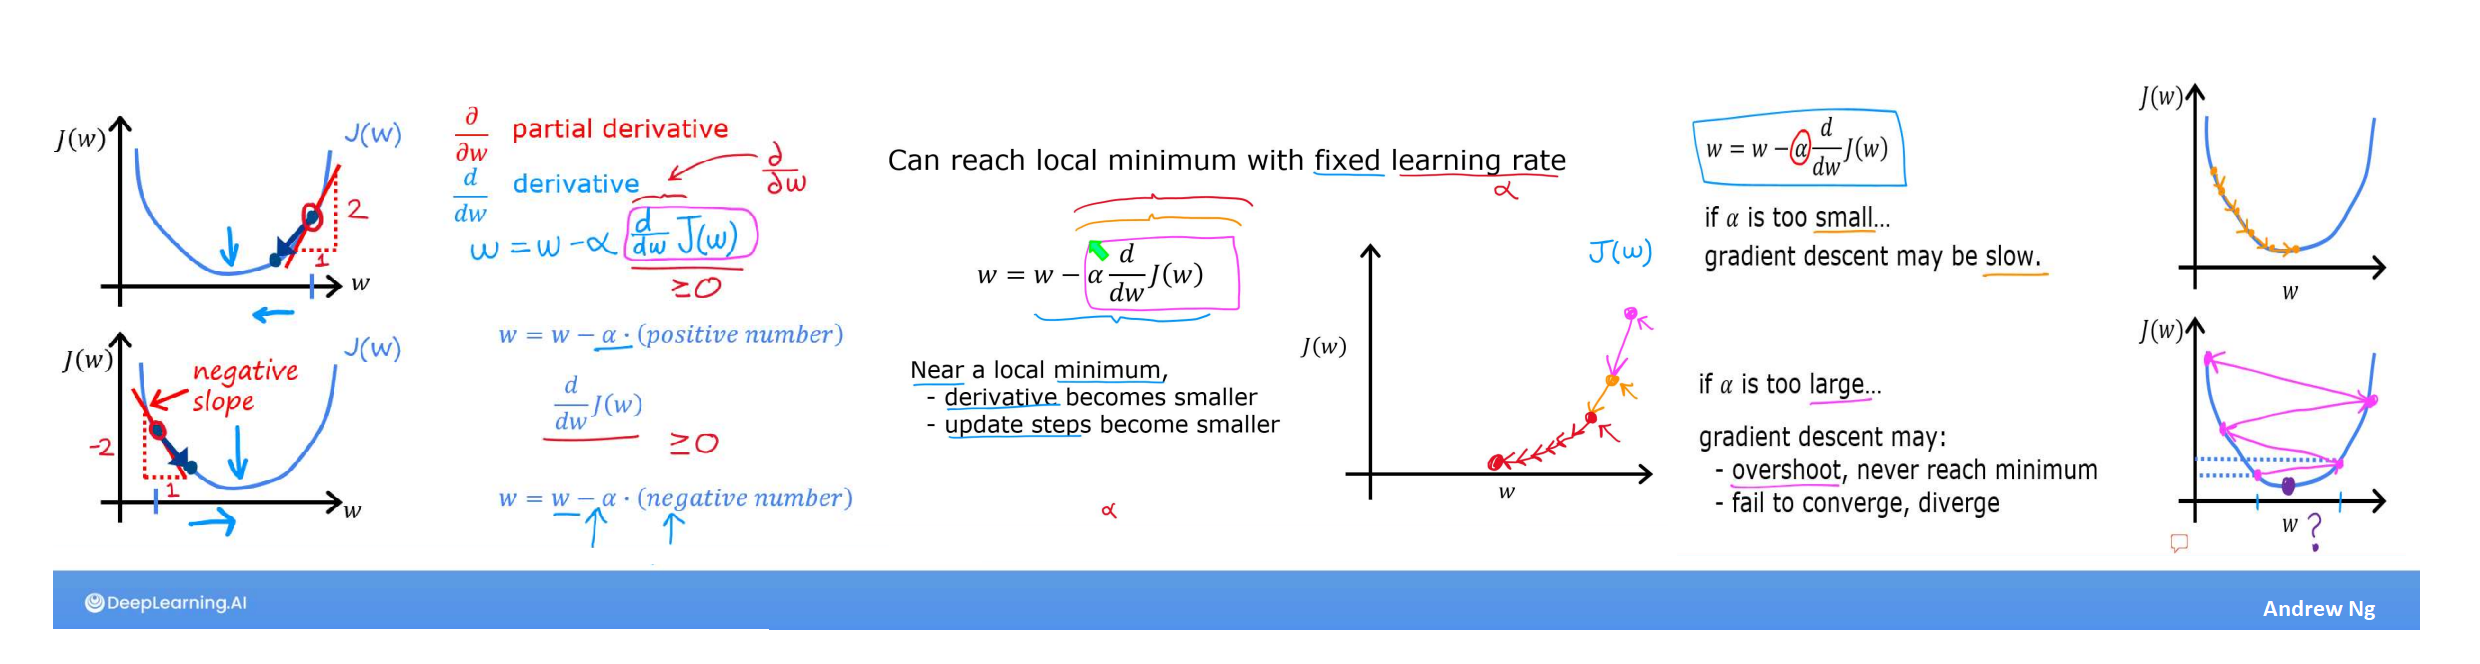
Fig. showing $w$ progress over the steps of Gradient descent. If $w$ oscilates from positive to negative, the cost grows rapidly. <br> 
Note: Gradient descent is operating on both $w$ and $b$ simultaneously, so one needs a 3D-plot (cost x b x w) for the complete picture.